In [4]:
import requests

headers = {
    'Content-Type': 'application/binary',
}
data = open('targetFolder/SOSP.pdf', 'rb').read()
response =  requests.post('http://cermine.ceon.pl/extract.do', headers=headers, data=data)

In [5]:
with open("responseCache/cerineSOSP.xml", "w") as f:
    f.write(response.text)

In [12]:
from bs4 import BeautifulSoup as bs
import bs4
sectionalContent = {}
with open("responseCache/cerineSOSP.xml") as f:
    responseData = f.read()
bs_content = bs(responseData, "lxml")
title = bs_content.find("article-title").contents[0]
sectionalContent["title"] = title
sections = bs_content.findAll("sec")
for section in sections:
    title = section.find("title").contents[0]
    body = ""
    for p in section.findAll("p"):
        for content in p.contents:
            if isinstance(content, bs4.element.NavigableString):
                body+=str(content)
    sectionalContent[title]=body

Kauri: Scalable BFT Consensus with Pipelined Tree-Based Dissemination and Aggregation


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

n_gram_range = (3, 3)
stop_words = "english"

# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([str(sectionalContent)])
candidates = count.get_feature_names()

/Users/hongyechen/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


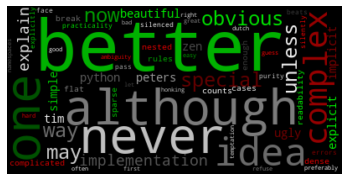

In [20]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt

class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = """The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(text.lower())

color_to_words = {
    # words below will be colored with a green single color function
    "#00ff00": ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', "better"],
    # will be colored with a red single color function
    "red": ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()